### `Import dependencies`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

### `Read the dataset`

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### `Exploratory Data Analysis`

In [3]:
df.drop(['id'], inplace=True, axis=1)

In [4]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### `Missing values`

In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:>

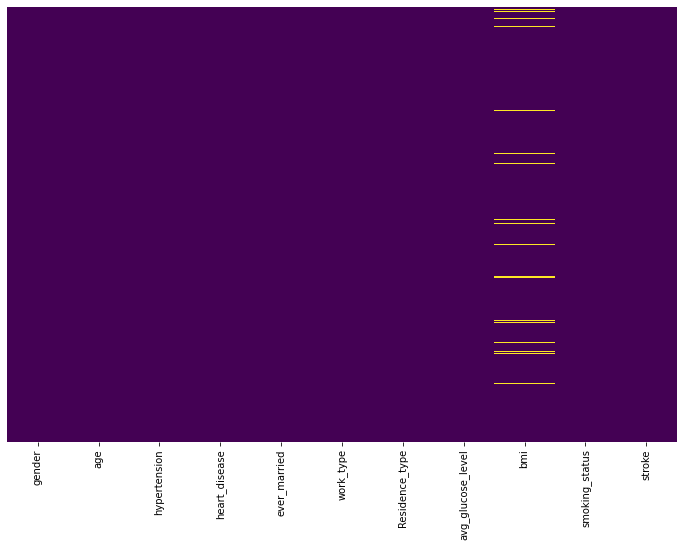

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

### `Data Visualization`

<AxesSubplot:xlabel='stroke', ylabel='count'>

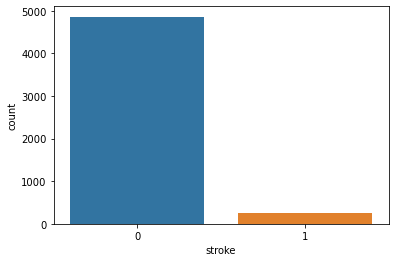

In [9]:
sns.countplot(df['stroke'])

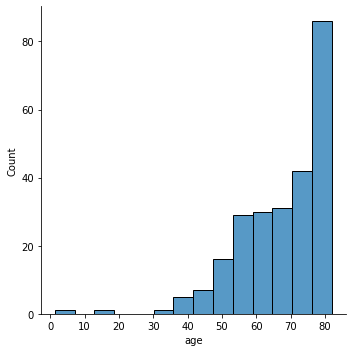

In [10]:
sns.displot(df[df['stroke']==1]['age'])

**Aged people are higly prone to this disease.**

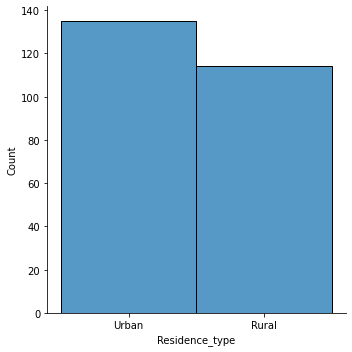

In [11]:
sns.displot(df[df['stroke']==1]['Residence_type'])

<AxesSubplot:xlabel='gender', ylabel='age'>

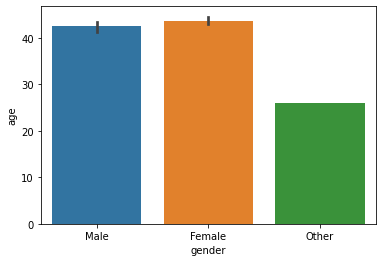

In [12]:
sns.barplot(x='gender', y='age', data=df)

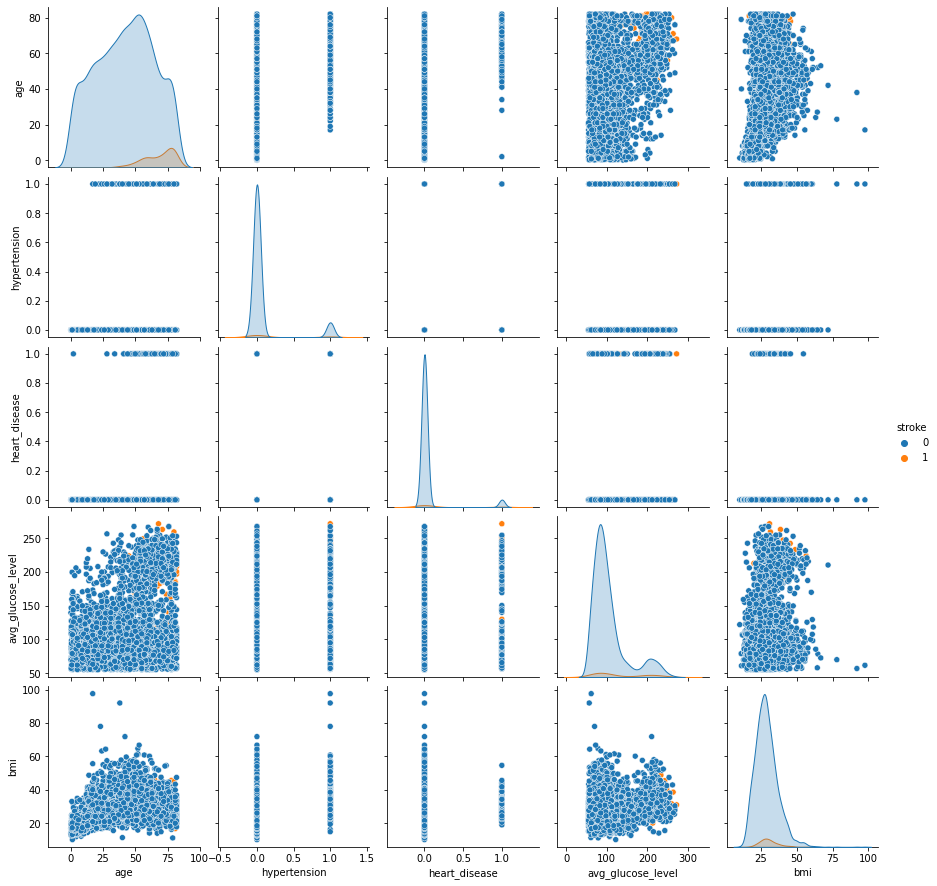

In [13]:
sns.pairplot(data=df, hue='stroke')

Text(0.5, 1.0, 'Correlation Matrix')

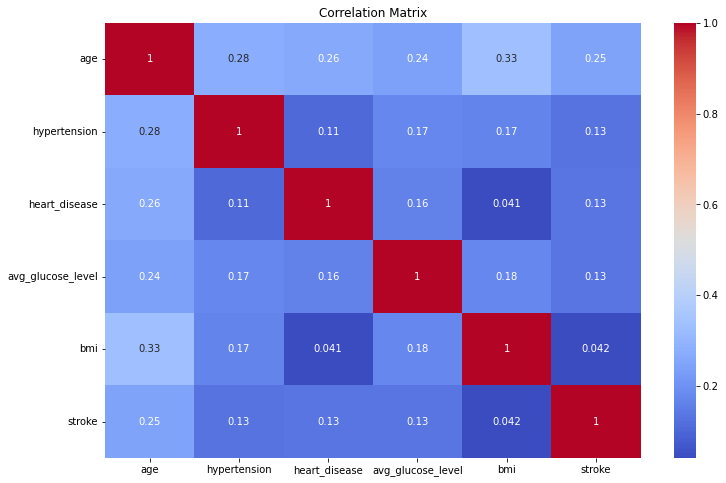

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')
plt.title("Correlation Matrix")

<AxesSubplot:xlabel='bmi', ylabel='Density'>

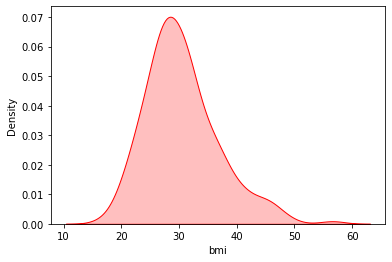

In [15]:
sns.kdeplot(df[df['stroke']==1]['bmi'], shade=True, color='red')

**People with BMI around 30 are having high chance of stroke.**

<AxesSubplot:xlabel='gender', ylabel='avg_glucose_level'>

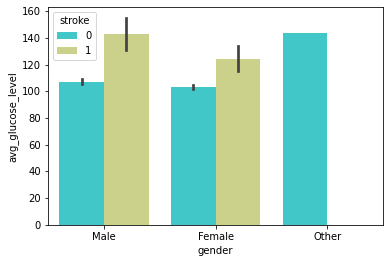

In [16]:
sns.barplot(x=df['gender'], y=df['avg_glucose_level'], hue=df['stroke'], palette='rainbow')

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

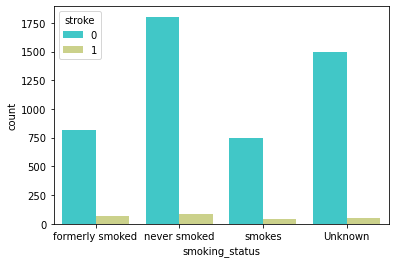

In [17]:
sns.countplot(x=df['smoking_status'], hue=df['stroke'], palette='rainbow')

<AxesSubplot:xlabel='age'>

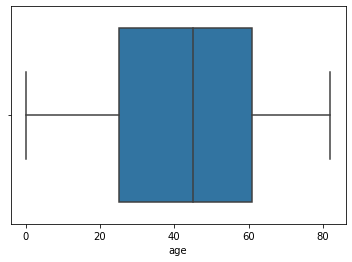

In [18]:
sns.boxplot(df['age'])

<AxesSubplot:xlabel='avg_glucose_level'>

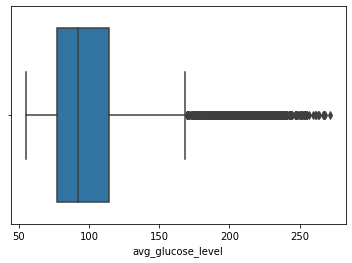

In [19]:
sns.boxplot(df["avg_glucose_level"])

<AxesSubplot:xlabel='hypertension', ylabel='count'>

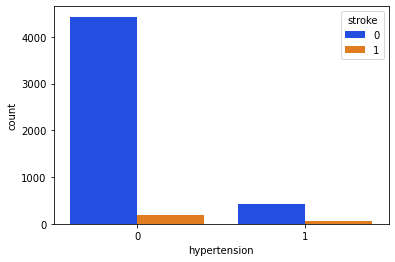

In [20]:
sns.countplot(x=df['hypertension'], hue=df['stroke'], palette='bright')

### `Data Preprocessing`

In [21]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [22]:
model_data = {}

In [23]:
def preprocess_inputs(df):
    df = df.copy()

    df['ever_married'] = df['ever_married'].replace({'No': 0, 'Yes': 1})
    df['Residence_type'] = df['Residence_type'].replace({'Rural': 0, 'Urban': 1})

    for column in ['gender', 'work_type', 'smoking_status']:
        df = onehot_encode(df, column=column)
    
    # Split df into X and y
    y = df['stroke']
    X = df.drop('stroke', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    
    # KNN imputation of missing values
    
    imputer = KNNImputer()
    imputer.fit(X_train)
    X_train = pd.DataFrame(imputer.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(imputer.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    model_data['scaler_obj'] = scaler
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [24]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [25]:
pd.DataFrame(y_train).value_counts()

stroke
0         3411
1          166
dtype: int64

In [26]:
X_train.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4313,0.608843,-0.330374,-0.238161,0.719002,0.994146,0.638258,0.010074,-1.174021,1.174021,0.0,-0.383679,-0.069103,0.864050,-0.438105,-0.392264,1.515511,-0.461023,-0.763376,-0.425344
376,-1.886989,-0.330374,-0.238161,-1.390817,-1.005888,-0.386663,-1.754554,0.851774,-0.851774,0.0,-0.383679,-0.069103,-1.157341,-0.438105,2.549304,1.515511,-0.461023,-0.763376,-0.425344
4913,-1.036663,-0.330374,-0.238161,-1.390817,0.994146,-0.466196,-1.105794,-1.174021,1.174021,0.0,-0.383679,-0.069103,0.864050,-0.438105,-0.392264,-0.659843,-0.461023,1.309970,-0.425344
1791,-1.347974,-0.330374,-0.238161,-1.390817,-1.005888,0.697358,-1.404223,-1.174021,1.174021,0.0,-0.383679,-0.069103,-1.157341,-0.438105,2.549304,1.515511,-0.461023,-0.763376,-0.425344
2166,-0.680878,-0.330374,-0.238161,0.719002,-1.005888,1.401291,-0.236455,-1.174021,1.174021,0.0,-0.383679,-0.069103,0.864050,-0.438105,-0.392264,1.515511,-0.461023,-0.763376,-0.425344


### `Model Building`

In [27]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                               XGBoost": XGBClassifier(eval_metric='mlogloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.


### `Model Performance`

In [28]:
print("Model Performance\n-----------------")
for name, model in models.items():
    y_pred = model.predict(X_test)
    print("\n" + name + " => Accuracy : {:.3f}%\n\t\t\t\t          F1-Score : {:.5f}"\
        .format(accuracy_score(y_test, y_pred) * 100, f1_score(y_test, y_pred)))

Model Performance
-----------------

                   Logistic Regression => Accuracy : 94.586%
				          F1-Score : 0.00000

                   K-Nearest Neighbors => Accuracy : 94.260%
				          F1-Score : 0.00000

                         Decision Tree => Accuracy : 90.868%
				          F1-Score : 0.16667

Support Vector Machine (Linear Kernel) => Accuracy : 94.586%
				          F1-Score : 0.00000

   Support Vector Machine (RBF Kernel) => Accuracy : 94.586%
				          F1-Score : 0.00000

                        Neural Network => Accuracy : 94.129%
				          F1-Score : 0.04255

                         Random Forest => Accuracy : 94.390%
				          F1-Score : 0.00000

                     Gradient Boosting => Accuracy : 94.586%
				          F1-Score : 0.00000

                               XGBoost => Accuracy : 93.738%
				          F1-Score : 0.11111


### `High data imbalance`

In [29]:
pd.DataFrame(y_train).value_counts()

stroke
0         3411
1          166
dtype: int64

### `Oversampling using SMOTE`

In [30]:
from imblearn.over_sampling import SMOTE

print("Before SMOTE : \n", pd.DataFrame(y_train).value_counts(),"\n")

smote = SMOTE(random_state=0)

X_train, y_train = smote.fit_resample(X_train, y_train)

print("After SMOTE : \n", pd.DataFrame(y_train).value_counts())

Before SMOTE : 
 stroke
0         3411
1          166
dtype: int64 

After SMOTE : 
 stroke
0         3411
1         3411
dtype: int64


### `Model training after oversampling`

In [31]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                               XGBoost": XGBClassifier(eval_metric='mlogloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.


### `Model performance after oversampling`

In [32]:
print("Model Performance\n-----------------")
for name, model in models.items():
    y_pred = model.predict(X_test)
    print("\n" + name + " => Accuracy : {:.3f}%\n\t\t\t\t          F1-Score : {:.5f}"\
        .format(accuracy_score(y_test, y_pred) * 100, f1_score(y_test, y_pred)))

Model Performance
-----------------

                   Logistic Regression => Accuracy : 74.234%
				          F1-Score : 0.24184

                   K-Nearest Neighbors => Accuracy : 82.583%
				          F1-Score : 0.12459

                         Decision Tree => Accuracy : 85.519%
				          F1-Score : 0.12598

Support Vector Machine (Linear Kernel) => Accuracy : 73.646%
				          F1-Score : 0.24627

   Support Vector Machine (RBF Kernel) => Accuracy : 81.539%
				          F1-Score : 0.18444

                        Neural Network => Accuracy : 87.345%
				          F1-Score : 0.11818

                         Random Forest => Accuracy : 91.520%
				          F1-Score : 0.10959

                     Gradient Boosting => Accuracy : 85.453%
				          F1-Score : 0.20072

                               XGBoost => Accuracy : 92.172%
				          F1-Score : 0.09091


**Selecting Random Forest Classifier for model development**

In [33]:
import pickle
model_data["model"] = RandomForestClassifier().fit(X_train, y_train)
with open("stroke_model.pkl", 'wb') as file:
    pickle.dump(model_data, file)

In [34]:
with open('stroke_model.pkl', 'rb') as file:
    model_data = pickle.load(file)

In [35]:
model = model_data['model']

In [36]:
model_data

{'scaler_obj': StandardScaler(), 'model': RandomForestClassifier()}

In [37]:
y_pred = model.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred)

0.9145466405740378

In [39]:
df[df["stroke"]==1].iloc[0, :]

gender                          Male
age                             67.0
hypertension                       0
heart_disease                      1
ever_married                     Yes
work_type                    Private
Residence_type                 Urban
avg_glucose_level             228.69
bmi                             36.6
smoking_status       formerly smoked
stroke                             1
Name: 0, dtype: object

In [40]:
df[df["stroke"]==0].iloc[0, :]

gender                   Male
age                       3.0
hypertension                0
heart_disease               0
ever_married               No
work_type            children
Residence_type          Rural
avg_glucose_level       95.12
bmi                      18.0
smoking_status        Unknown
stroke                      0
Name: 249, dtype: object

#### 




### 

### 
##   